# Modelos de Probabilidad

## Probabilidad lineal

En este caso la variable dependiente es una dummy


<img src="images/RL_Im7.png" width="500" height="300">

Se trata de modelos del tipo:

$$
D_{i} = \beta_{0}+\beta_{1}X_{1i}+u_{i}
$$

Veamos un ejemplo: Abrir la base `MROZ` de Wooldridge y ajuste el modelo:

$$
inlf=\beta_0nwifeinc+\beta_1educ + \beta_2exper +\beta_3expersq + \beta_4age + \beta_5kidslt6 + \beta_6kidsge6
$$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# np.set_printoptions(precision=2)

uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/mroz.csv"
datos = pd.read_csv(uu,header = None)


datos.columns = ["inlf","hours",  "kidslt6", "kidsge6", 
               "age", "educ",  "wage",
               "repwage","hushrs"  ,  "husage", "huseduc" ,
               "huswage"  , "faminc", "mtr","motheduc",
               "fatheduc" , "unem",  "city" , "exper" , 
               "nwifeinc" , "lwage" ,"expersq"]


import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
from scipy import stats

reg1 = smf.ols('inlf ~ nwifeinc + educ + exper + expersq + age+kidslt6 + kidsge6',data = datos).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                   inlf   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     38.22
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           6.90e-46
Time:                        05:33:31   Log-Likelihood:                -423.89
No. Observations:                 753   AIC:                             863.8
Df Residuals:                     745   BIC:                             900.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5855      0.154      3.798      0.0

¿Qué hemos ajustado?

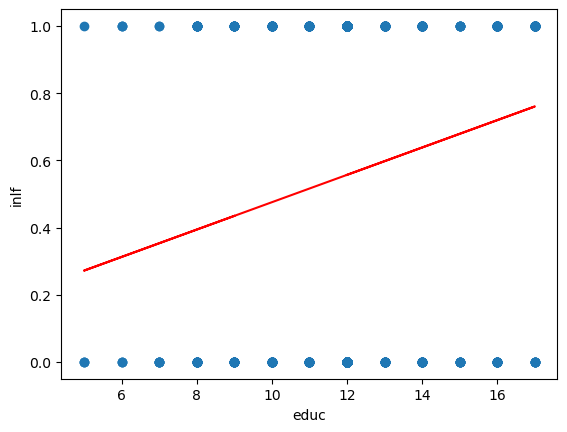

In [2]:
aux = smf.ols('inlf ~ educ',data = datos).fit()

plt.figure()
plt.plot(datos.educ,datos.inlf,'o');
plt.plot(datos.educ,aux.fittedvalues,'-',color='r');
plt.xlabel('educ');
plt.ylabel('inlf');



- Excepto *kidsge6* los coeficientes son significativos.
- Se introdujo la experiencia cuadrática para capturar un efecto decreciente en el efecto deseado (`inlf`). ¿Cómo lo interpretamos?

`.039 - 2(.0006)exper = 0.39 - .0012exper`

- El punto en el que la experiencia ya no tiene efecto en `inlf` es $.039/.0012 = 32.5$. ¿Cuantos elementos de la muestra tienen más de 32 años de experiencia?


Se añade exper al cuadrado porque queremos dar la posibilidad que los años adicionales de expericnecia contribuyan con un efecto decreciente.

Trabajemos ahora con la predicción, y revisemos el resultado:

In [3]:
pred_vals = reg1.predict()
aux = list(zip(datos.inlf,pred_vals))
print(aux[0:5])


stats.describe(pred_vals)

[(1, 0.6636123221355517), (1, 0.7009165727274149), (1, 0.6727286212890473), (1, 0.7257441305286598), (1, 0.5616358247349595)]


DescribeResult(nobs=753, minmax=(-0.3451102646574087, 1.1271505290421102), mean=0.5683930942895058, variance=0.06490433214015537, skewness=-0.4241251818053438, kurtosis=-0.07391834122184227)

¿Qué podemos notar?


- Existen valores mayores a 1 e inferiores a 0.
- $R^{2}$ ya no es interpretable en estas regresiones.
- Usaremos una probabilidad de ocurrencia, digamos 0.5

In [4]:
prediccion_dum = (pred_vals>=0.5)*1

tab = pd.crosstab(datos.inlf,prediccion_dum)
(tab.iloc[0,0]+tab.iloc[1,1])/datos.shape[0]

0.7343957503320053

## Logit

La regresión logística puede entenderse simplemente como encontrar los parámtros $\beta$ que mejor asjuten:

$$
y={\begin{cases}1&\beta_{1}+\beta_{2}X_{1}+\cdots+\beta_{k}X_{k}+u >0\\0&{\text{en otro caso}}\end{cases}}
$$

Donde se asume que el error tiene una [distribución logística estándar](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_log%C3%ADstica)

$$
{\displaystyle f(x;\mu ,s)={\frac {e^{-{\frac {x-\mu }{s}}}}{s\left(1+e^{-{\frac {x-\mu }{s}}}\right)^{2}}}={\frac {1}{s\left(e^{\frac {x-\mu }{2s}}+e^{-{\frac {x-\mu }{2s}}}\right)^{2}}}={\frac {1}{4s}}\operatorname {sech} ^{2}\!\left({\frac {x-\mu }{2s}}\right).}
$$

Donde $s$ es el parámetro de escala y $\mu$ el de locación (*sech* es la función secante hiperbólico).


Otra forma de entender la regresión logística es a través de la función logística:

$$
\sigma (t)={\frac {e^{t}}{e^{t}+1}}={\frac {1}{1+e^{-t}}}
$$

donde $t\in \mathbb{R}$ y $0\leq\sigma (t)\leq1$.

Asumiento $t$ como una función lineal de una variable explicativa $x$, tenemos:

$$
t=\beta _{0}+\beta _{1}x
$$

Ahora la función logística se puede expresar:

$$
p(x)={\frac {1}{1+e^{-(\beta _{0}+\beta _{1}x)}}}
$$

Ten en cuenta que $p (x)$ se interpreta como la probabilidad de que la variable dependiente iguale a *éxito*  en lugar de un *fracaso*. Está claro que las variables de respuesta $Y_ {i}$ no se distribuyen de forma idéntica: $ P (Y_ {i} = 1 \ mid X )$ difiere de un punto $X_ {i}$ a otro, aunque son independientes dado que la matriz de diseño $X$ y los parámetros compartidos $\beta$.

Finalmente definimos la inversa de la función logística, $g$, el **logit** (log odds):

$$
{\displaystyle g(p(x))=\ln \left({\frac {p(x)}{1-p(x)}}\right)=\beta _{0}+\beta _{1}x,}
$$

lo que es equivalente a:

$$
{\frac {p(x)}{1-p(x)}}=e^{\beta _{0}+\beta _{1}x}
$$

**Interpretación**:

-   $g$ es la función logit. La ecuación para $g (p (x))$ ilustra que el logit (es decir, log-odds o logaritmo natural de las probabilidades) es equivalente a la expresión de regresión lineal.
-   $ln$ denota el logaritmo natural.
-   $p (x)$ es la probabilidad de que la variable dependiente sea igual a un caso, dada alguna combinación lineal de los predictores. La fórmula para $p (x)$ ilustra que la probabilidad de que la variable dependiente iguale un caso es igual al valor de la función logística de la expresión de regresión lineal. Esto es importante porque muestra que el valor de la expresión de regresión lineal puede variar de infinito negativo a positivo y, sin embargo, después de la transformación, la expresión resultante para la probabilidad $p (x)$ oscila entre $0$ y $1$.
-   $\beta _ {0}$ es la intersección de la ecuación de regresión lineal (el valor del criterio cuando el predictor es igual a cero).
-   $\beta _ {1} x$ es el coeficiente de regresión multiplicado por algún valor del predictor.
-   la base $e$ denota la función exponencial.

**Ejemplo**

Abra la tabla 15.7 


-   Los datos son el efecto del Sistema de Enseñanza Personalizada (PSI) sobre las calificaciones.
    -   Calificación $Y = 1$ si la calificación final fue A
    -   $Y = 0$ si la calificación final fue B o C
    -   `TUCE` = calificación en un examen presentado al comienzo del curso para evaluar los conocimientos previos de macroeconomía
    -   `PSI` = 1 con el nuevo método de enseñanza, 0 en otro caso
    -   `GPA` = promedio de puntos de calificación inicial
-   Ajuste el siguiente modelo:
`ajuste1 <- glm(GRADE~GPA+TUCE+PSI,
family=binomial(link="logit"),x=T)`
-   Interprete el modelo


En los modelos cuya variable regresada binaria, la bondad del ajuste tiene una importancia secundaria. Lo que interesa son los signos esperados de los coeficientes de la regresión y su importancia práctica y/o estadística.


Importamos los datos y revisamos la variable dependiente:

In [5]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/tabla15_7.csv"
datos = pd.read_csv(uu,sep = ';')
datos.columns

# import statsmodels.api as sm
datos.pivot_table(index = 'GRADE', aggfunc = [len])

len                    
      GPA LETTER OBS PSI TUCE
GRADE                        
0      21     21  21  21   21
1      11     11  11  11   11

Ajustamos el modelo:

In [6]:
ajuste1 = smf.logit('GRADE ~ GPA + TUCE + PSI',data = datos).fit()

print(ajuste1.summary())

Optimization terminated successfully.
         Current function value: 0.402801
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Wed, 18 Sep 2024   Pseudo R-squ.:                  0.3740
Time:                        05:33:32   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
Covariance Type:            nonrobust   LLR p-value:                  0.001502
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.0213      4.931     -2.641      0.008     -22.687      -3.356
GPA            2.8261      1.

In [7]:
ajuste1.get_margeff(at='mean').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  GRADE
Method:                          dydx
At:                              mean
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GPA            0.5339      0.237      2.252      0.024       0.069       0.998
TUCE           0.0180      0.026      0.685      0.493      -0.033       0.069
PSI            0.4493      0.197      2.284      0.022       0.064       0.835
==============================================================================
"""

In [8]:
mm = ajuste1.get_margeff(at='all').margeff
mm[0:10,:]

array([[0.07311607, 0.00246188, 0.06154047],
       [0.15815168, 0.0053251 , 0.1331134 ],
       [0.43011639, 0.01448239, 0.36202116],
       [0.07130492, 0.0024009 , 0.06001605],
       [0.69272252, 0.02332457, 0.58305197],
       [0.09507939, 0.00320141, 0.08002659],
       [0.0729182 , 0.00245522, 0.06137393],
       [0.1381988 , 0.00465327, 0.11631942],
       [0.2791564 , 0.00939944, 0.23496087],
       [0.60069976, 0.02022608, 0.50559808]])

¿Son, en conjunto, los coeficientes significativos?

In [9]:
hyp = '(Intercept = 0, GPA = 0,TUCE=0,PSI=0)'
ajuste1.wald_test(hyp,scalar = True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=8.873128862019607, p-value=0.06435007959304212, df_denom=4>

In [10]:
np.exp(ajuste1.params)

Intercept     0.000002
GPA          16.879715
TUCE          1.099832
PSI          10.790732
dtype: float64

Esto indica que los estudiantes expuestos al nuevo método de enseñanza son 10 veces más propensos a obtener una A que quienes no están expuestos al nuevo método, en tanto no cambien los demás factores.

In [17]:
ajuste1.predict(which = 'linear')

array([-2.09308603, -1.61569183, -0.87816803, -2.08420699,  0.13722837,
       -1.92311086, -2.08569187, -1.69993698, -1.23289159,  0.42099513,
       -2.14186033, -0.86486457, -0.45841206, -0.85895528, -0.36825763,
       -2.01475018, -1.6881184 , -1.86842727,  0.23630576,  0.40479606,
       -1.53878182,  1.30785551, -0.60319106,  1.02555852,  0.97087493,
       -0.02826337,  0.3649008 , -0.44357981,  0.99452719,  1.6670186 ,
        0.10033167, -1.15745135])

## Probit

En los modelos logia se propuso la logística, en este caso se propone la Función de Distribución Acumulada Normal. Suponga que la variable de respuesta es binaria, 1 o 0. $Y$ podría representar la presencia/ausencia de una condición, éxito/fracaso, si/no. Se tiene también un vector de regresoras $X$, el modelo toma la forma:

$$
{\displaystyle \Pr(Y=1\mid X)=\Phi (X^{T}\beta ),}
$$

donde $Pr$ es la prbabilidad y $\Phi$ distribución acumulada de la normal estándar ${\displaystyle \Phi (x)={\frac {1}{\sqrt {2\pi }}}\int _{-\infty }^{x}e^{-t^{2}/2}\,dt}$. Los parámetros $\beta$ se estiman típicamente con el método de máxima verosimilitud.


**Ejemplo**

In [12]:
ajuste1 = smf.probit('GRADE ~ GPA + TUCE + PSI',data = datos).fit()

print(ajuste1.summary())

Optimization terminated successfully.
         Current function value: 0.400588
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                         Probit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Wed, 18 Sep 2024   Pseudo R-squ.:                  0.3775
Time:                        05:33:32   Log-Likelihood:                -12.819
converged:                       True   LL-Null:                       -20.592
Covariance Type:            nonrobust   LLR p-value:                  0.001405
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4523      2.542     -2.931      0.003     -12.435      -2.469
GPA            1.6258      0.

In [13]:
ajuste1.get_margeff(at='mean').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:                  GRADE
Method:                          dydx
At:                              mean
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GPA            0.5333      0.232      2.294      0.022       0.078       0.989
TUCE           0.0170      0.027      0.626      0.531      -0.036       0.070
PSI            0.4679      0.188      2.494      0.013       0.100       0.836
==============================================================================
"""

In [14]:
mm = ajuste1.get_margeff(at='all').margeff
mm[0:10,:]

array([[0.07255307, 0.00230845, 0.06365122],
       [0.17584323, 0.00559486, 0.15426826],
       [0.44108314, 0.01403409, 0.38696473],
       [0.07391114, 0.00235166, 0.06484266],
       [0.64252589, 0.02044346, 0.5636916 ],
       [0.10206861, 0.00324755, 0.08954537],
       [0.07368267, 0.00234439, 0.06464222],
       [0.15292232, 0.00486558, 0.13415961],
       [0.3033272 , 0.00965106, 0.26611067],
       [0.59359928, 0.01888675, 0.520768  ]])

In [16]:
ajuste1.predict(which = 'linear')

array([-2.09308603, -1.61569183, -0.87816803, -2.08420699,  0.13722837,
       -1.92311086, -2.08569187, -1.69993698, -1.23289159,  0.42099513,
       -2.14186033, -0.86486457, -0.45841206, -0.85895528, -0.36825763,
       -2.01475018, -1.6881184 , -1.86842727,  0.23630576,  0.40479606,
       -1.53878182,  1.30785551, -0.60319106,  1.02555852,  0.97087493,
       -0.02826337,  0.3649008 , -0.44357981,  0.99452719,  1.6670186 ,
        0.10033167, -1.15745135])